In [1]:
# Import and GPU Support
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import time

from B_data import create_residual_data, create_IC_data, initial_u,exact_u, create_BC_data, create_RH_data,create_RH_data_endt,Move_Time_1D
from B_Plotting import Burgers_plot, loss_plot 

# Full PINN
from B_PINN import NN
from B_PINN_train import pinn_train

# Burgers GPT-PINN
from B_GPT_activation import P
from B_GPT_PINN import GPT
from B_GPT_train import gpt_train

torch.set_default_dtype(torch.float)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current Device: {device}")
if torch.cuda.is_available():
    print(f"Current Device Name: {torch.cuda.get_device_name()}")

Current Device: cuda
Current Device Name: NVIDIA A100-SXM4-40GB


In [2]:
# Training Parameter Set
number_of_parameters = 1
nu_training = np.linspace(1,2,number_of_parameters)
nu_pinn_train = 1.0
number_of_neurons = 1
P_list = np.ones(number_of_neurons, dtype=object)

In [3]:
# Domain and Data
Xi, Xf         = -1.0, 1.0
Ti, Tf         =  0.0, 1.0
Nx_train, Nt_train =  101, 201
Nx_test, Nt_test = 101, 201
IC_pts, IC_simple = 100, 100
BC_pts =  100
N_RH = IC_pts
dx = 0.001
dt = 0.0002

residual_data = create_residual_data(Xi, Xf, Ti, Tf, Nx_train, Nt_train, Nx_test, Nt_test, dx,dt)
xt_resid      = residual_data[0].to(device)
f_hat         = residual_data[1].to(device)
xt_test       = residual_data[2].to(device)
xt_RHL      = residual_data[3].to(device)
xt_RHR      = residual_data[4].to(device)
xt_RHt         = residual_data[5].to(device)
xt_RHtL       = residual_data[6].to(device)

BC_data = create_BC_data(Xi, Xf, Ti, Tf, BC_pts)
BC1     = BC_data[0].to(device)
BC2     = BC_data[1].to(device)

#xt_RH_data = create_RH_data(Xi, Xf, Ti, Tf, IC_pts, N_RH,dx)
#xt_RH = xt_RH_data[0].to(device)
#xt_RHL = xt_RH_data[1].to(device)

IC_data = create_IC_data(nu_pinn_train,Xi, Xf, Ti, Tf, IC_pts, IC_simple)
IC_xt     = IC_data[0].to(device)
IC_u      = IC_data[1].to(device)

xt_en = Move_Time_1D(IC_xt, Tf).to(device)

In [4]:
# Setting PINN and TGPT-PINN
#layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
layers_pinn = np.array([2, 20,20,20,20, 1])

lr_pinn     = 0.001
epochs_pinn = 25000
tol_pinn    = 1e-6

pinn_train_times = np.ones(number_of_neurons)

###############################################################################
################################ Training Loop ################################
###############################################################################

******************************************************************


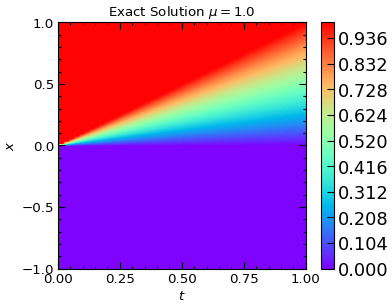

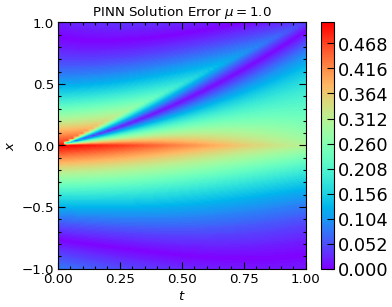

Epoch: 200 | loss: 0.6154182553291321,rMAE: 0.3677259385585785, rRMSE:0.3136509358882904,loss_RH:0.00000000,loss_con:1.09351158,loss_R:0.1010051965713501,loss_IC:0.049306612461805344,loss_BC:0.0021346956491470337


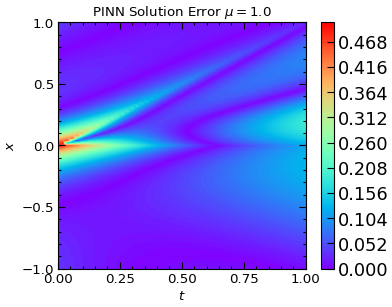

Epoch: 400 | loss: 0.3224315047264099,rMAE: 0.12486093491315842, rRMSE:0.124482162296772,loss_RH:0.00000000,loss_con:1.00235605,loss_R:0.13531239330768585,loss_IC:0.018363522365689278,loss_BC:0.0003483912441879511


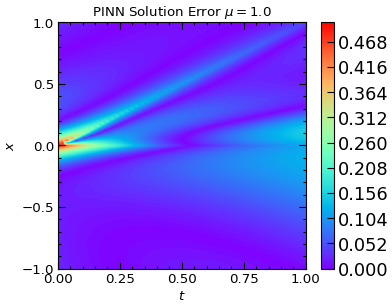

Epoch: 600 | loss: 0.24503710865974426,rMAE: 0.10325011610984802, rRMSE:0.10168110579252243,loss_RH:0.00000000,loss_con:0.98080331,loss_R:0.11922023445367813,loss_IC:0.012223150581121445,loss_BC:0.0003585369559004903


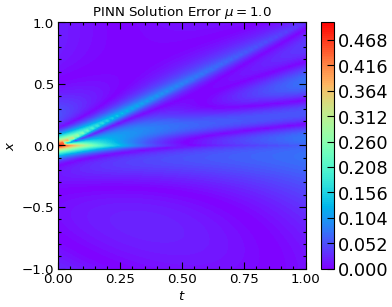

Epoch: 800 | loss: 0.17806518077850342,rMAE: 0.06964019685983658, rRMSE:0.07361540198326111,loss_RH:0.00000000,loss_con:0.99835223,loss_R:0.09081175923347473,loss_IC:0.008504921570420265,loss_BC:0.00022042015916667879


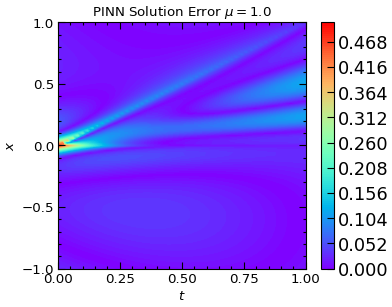

Epoch: 1000 | loss: 0.15104593336582184,rMAE: 0.06728043407201767, rRMSE:0.0669533908367157,loss_RH:0.00000000,loss_con:1.00544167,loss_R:0.08299727737903595,loss_IC:0.006627819500863552,loss_BC:0.00017704609490465373


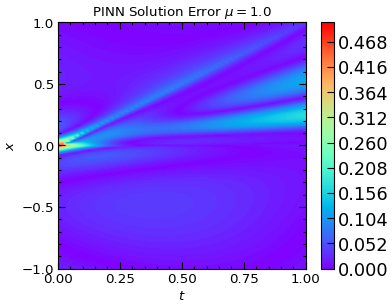

Epoch: 1200 | loss: 0.13786622881889343,rMAE: 0.06986095011234283, rRMSE:0.06856567412614822,loss_RH:0.00000000,loss_con:1.00633049,loss_R:0.08109917491674423,loss_IC:0.005528491456061602,loss_BC:0.00014821429795119911


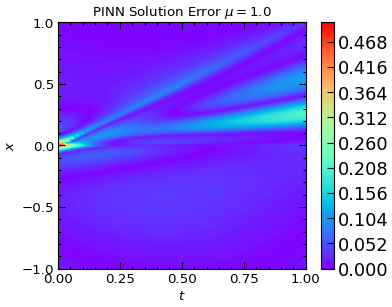

Epoch: 1400 | loss: 0.12925449013710022,rMAE: 0.07190866023302078, rRMSE:0.07148187607526779,loss_RH:0.00000000,loss_con:1.00463617,loss_R:0.0812971442937851,loss_IC:0.004682488739490509,loss_BC:0.00011324668594170362


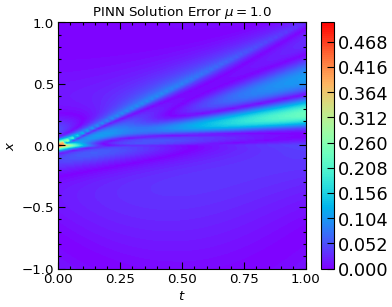

Epoch: 1600 | loss: 0.12200121581554413,rMAE: 0.07162661850452423, rRMSE:0.07418156415224075,loss_RH:0.00000000,loss_con:1.00200438,loss_R:0.08144912123680115,loss_IC:0.003976273350417614,loss_BC:7.893650763435289e-05


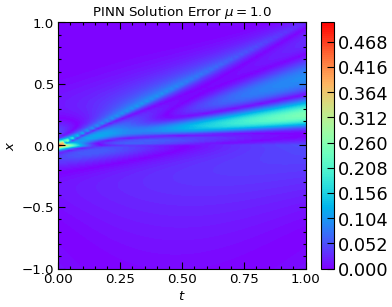

Epoch: 1800 | loss: 0.11531917750835419,rMAE: 0.07066504657268524, rRMSE:0.07637907564640045,loss_RH:0.00000000,loss_con:0.99952453,loss_R:0.08082115650177002,loss_IC:0.0033938426058739424,loss_BC:5.5959280871320516e-05


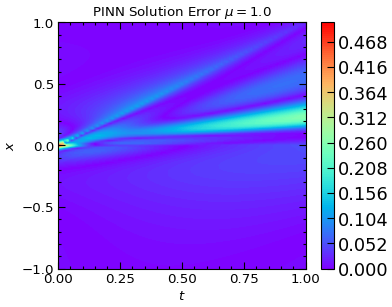

Epoch: 2000 | loss: 0.10825218260288239,rMAE: 0.06969134509563446, rRMSE:0.0773913562297821,loss_RH:0.00000000,loss_con:0.99789268,loss_R:0.07864338159561157,loss_IC:0.0029147686436772346,loss_BC:4.6111803385429084e-05


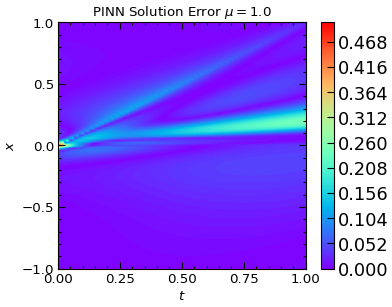

Epoch: 2200 | loss: 0.09985870122909546,rMAE: 0.06646419316530228, rRMSE:0.07570710778236389,loss_RH:0.00000000,loss_con:0.99708426,loss_R:0.07432176172733307,loss_IC:0.0025042868219316006,loss_BC:4.940662984154187e-05


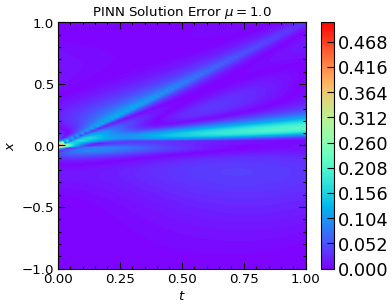

Epoch: 2400 | loss: 0.09098877012729645,rMAE: 0.060449372977018356, rRMSE:0.06969254463911057,loss_RH:0.00000000,loss_con:0.99674952,loss_R:0.0690898522734642,loss_IC:0.0021289633587002754,loss_BC:6.092811599955894e-05


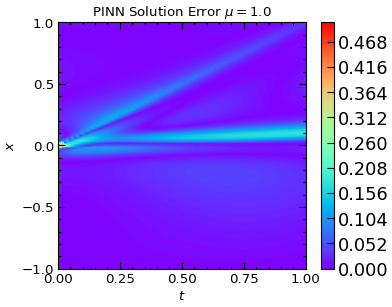

Epoch: 2600 | loss: 0.08633726835250854,rMAE: 0.0558624193072319, rRMSE:0.0622914619743824,loss_RH:0.00000000,loss_con:1.00177062,loss_R:0.06799539923667908,loss_IC:0.0017744910437613726,loss_BC:5.969612902845256e-05


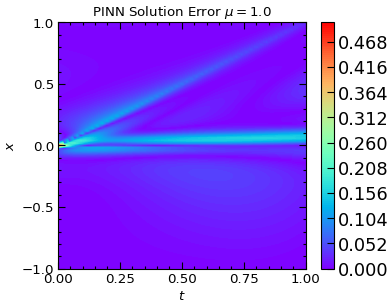

Epoch: 2800 | loss: 0.07869571447372437,rMAE: 0.05135872960090637, rRMSE:0.05896162614226341,loss_RH:0.00000000,loss_con:1.00103760,loss_R:0.06372305750846863,loss_IC:0.0014587556943297386,loss_BC:3.8510152080561966e-05


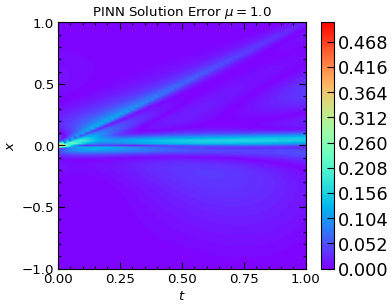

Epoch: 3000 | loss: 0.07068339735269547,rMAE: 0.04694218933582306, rRMSE:0.05653136596083641,loss_RH:0.00000000,loss_con:0.99742103,loss_R:0.058669313788414,loss_IC:0.0011764911469072104,loss_BC:2.491737177479081e-05


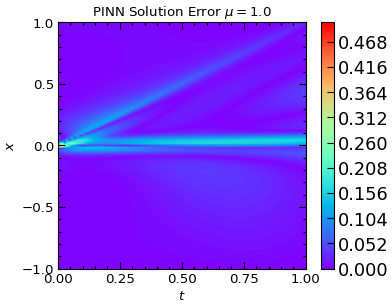

Epoch: 3200 | loss: 0.07280682027339935,rMAE: 0.048106830567121506, rRMSE:0.056262366473674774,loss_RH:0.00000000,loss_con:1.00938082,loss_R:0.06313679367303848,loss_IC:0.0009386915480718017,loss_BC:2.831147867254913e-05


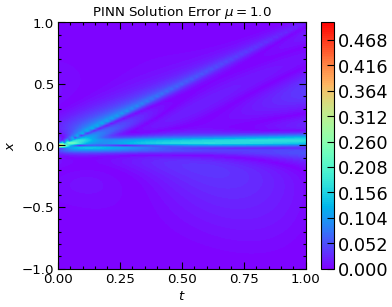

Epoch: 3400 | loss: 0.06475525349378586,rMAE: 0.04294097423553467, rRMSE:0.054778166115283966,loss_RH:0.00000000,loss_con:0.99496275,loss_R:0.05732768028974533,loss_IC:0.0007248250185512006,loss_BC:1.793212868506089e-05


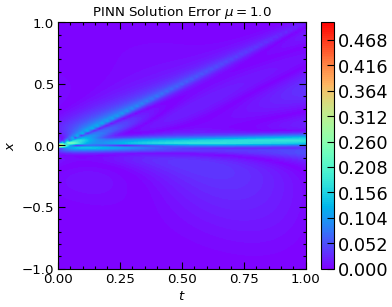

Epoch: 3600 | loss: 0.06374424695968628,rMAE: 0.0429064966738224, rRMSE:0.054167941212654114,loss_RH:0.00000000,loss_con:0.99990487,loss_R:0.05806923285126686,loss_IC:0.0005542717990465462,loss_BC:1.3229662727098912e-05


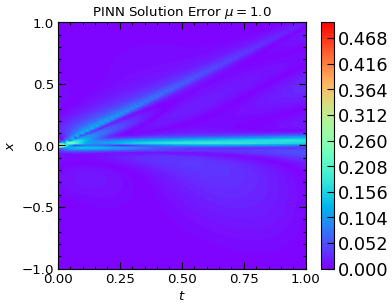

Epoch: 3800 | loss: 0.060813192278146744,rMAE: 0.0406716912984848, rRMSE:0.052312787622213364,loss_RH:0.00000000,loss_con:1.00185597,loss_R:0.05647937208414078,loss_IC:0.0004200723778922111,loss_BC:1.3309588211996015e-05


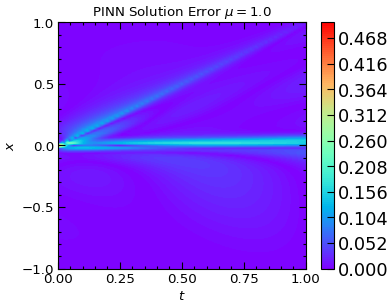

Epoch: 4000 | loss: 0.05833427980542183,rMAE: 0.03866276517510414, rRMSE:0.04951922222971916,loss_RH:0.00000000,loss_con:0.99869543,loss_R:0.05503125116229057,loss_IC:0.00031774293165653944,loss_BC:1.2560048162413295e-05


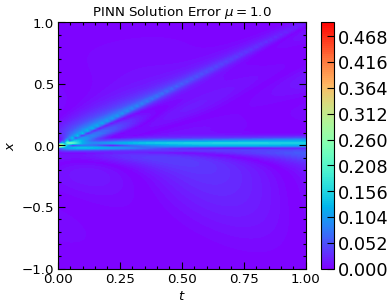

Epoch: 4200 | loss: 0.05575216934084892,rMAE: 0.03594932705163956, rRMSE:0.046219758689403534,loss_RH:0.00000000,loss_con:1.00154769,loss_R:0.053235989063978195,loss_IC:0.00023926643189042807,loss_BC:1.2351471923466306e-05


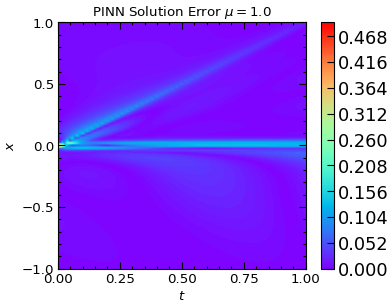

Epoch: 4400 | loss: 0.055943842977285385,rMAE: 0.03652196004986763, rRMSE:0.043853502720594406,loss_RH:0.00000000,loss_con:1.01178527,loss_R:0.05379844084382057,loss_IC:0.00018526001076679677,loss_BC:2.9280232411110774e-05


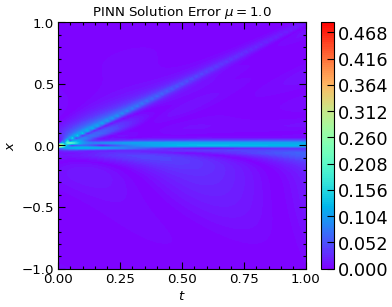

Epoch: 4600 | loss: 0.05084410309791565,rMAE: 0.030018296092748642, rRMSE:0.040038567036390305,loss_RH:0.00000000,loss_con:0.99608505,loss_R:0.04931160435080528,loss_IC:0.00014099063992034644,loss_BC:1.2259141840331722e-05


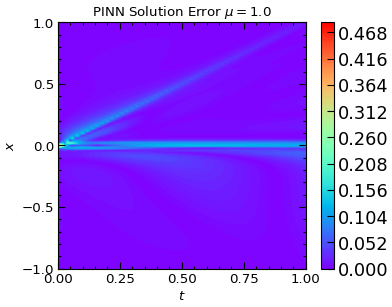

Epoch: 4800 | loss: 0.043334826827049255,rMAE: 0.02900863066315651, rRMSE:0.03822975978255272,loss_RH:0.00000000,loss_con:0.99616349,loss_R:0.042112067341804504,loss_IC:0.00010994586045853794,loss_BC:1.2330028766882606e-05


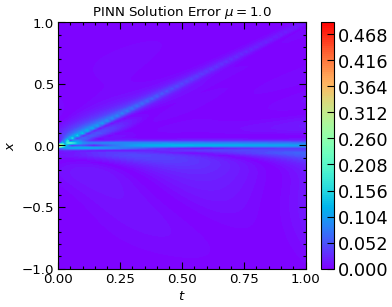

Epoch: 5000 | loss: 0.04826768487691879,rMAE: 0.02677411586046219, rRMSE:0.035992588847875595,loss_RH:0.00000000,loss_con:1.00367761,loss_R:0.04730519279837608,loss_IC:8.503598655806854e-05,loss_BC:1.1213284778932575e-05


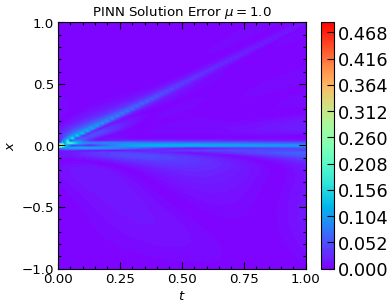

Epoch: 5200 | loss: 0.04735943302512169,rMAE: 0.025395696982741356, rRMSE:0.03453905135393143,loss_RH:0.00000000,loss_con:0.99693769,loss_R:0.046563152223825455,loss_IC:6.890072108944878e-05,loss_BC:1.072754184860969e-05


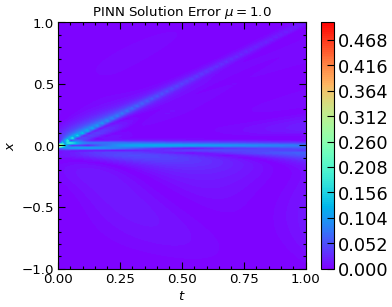

Epoch: 5400 | loss: 0.048321448266506195,rMAE: 0.024919908493757248, rRMSE:0.033226776868104935,loss_RH:0.00000000,loss_con:1.00513065,loss_R:0.04763714224100113,loss_IC:5.551689173444174e-05,loss_BC:1.2913625141663942e-05


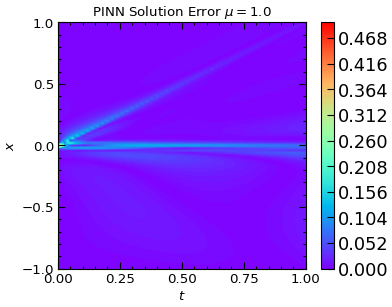

Epoch: 5600 | loss: 0.045242298394441605,rMAE: 0.024875910952687263, rRMSE:0.03227189555764198,loss_RH:0.00000000,loss_con:0.99168569,loss_R:0.044561538845300674,loss_IC:4.929203350911848e-05,loss_BC:1.8784008716465905e-05


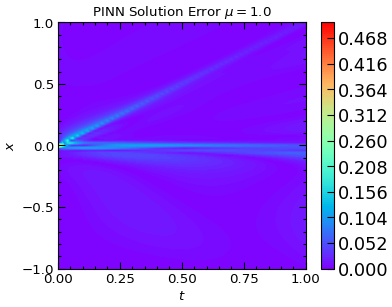

Epoch: 5800 | loss: 0.055777113884687424,rMAE: 0.02469577081501484, rRMSE:0.031056739389896393,loss_RH:0.00000000,loss_con:1.00701177,loss_R:0.05524739623069763,loss_IC:3.7546433304669335e-05,loss_BC:1.5425306628458202e-05


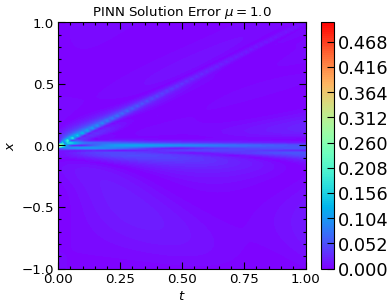

Epoch: 6000 | loss: 0.04048706963658333,rMAE: 0.025481536984443665, rRMSE:0.030589424073696136,loss_RH:0.00000000,loss_con:0.99230003,loss_R:0.039981432259082794,loss_IC:3.3602431358303875e-05,loss_BC:1.696147955954075e-05


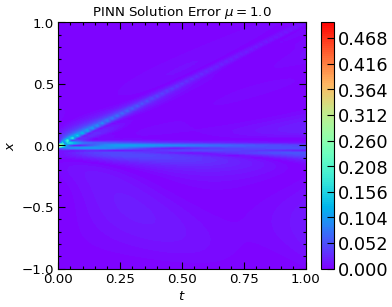

Epoch: 6200 | loss: 0.04655417054891586,rMAE: 0.02281365916132927, rRMSE:0.029376767575740814,loss_RH:0.00000000,loss_con:0.99537432,loss_R:0.046164803206920624,loss_IC:2.6192432414973155e-05,loss_BC:1.2744420928356703e-05


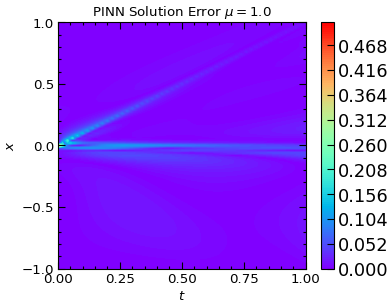

Epoch: 6400 | loss: 0.0488487146794796,rMAE: 0.022509805858135223, rRMSE:0.028609804809093475,loss_RH:0.00000000,loss_con:0.99347824,loss_R:0.048475246876478195,loss_IC:2.3351933123194613e-05,loss_BC:1.399497614329448e-05


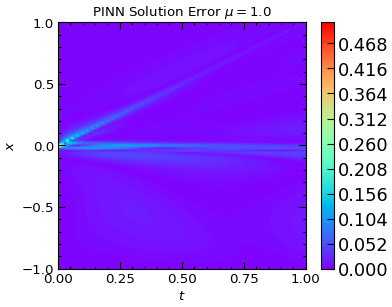

Epoch: 6600 | loss: 0.04188824072480202,rMAE: 0.022877812385559082, rRMSE:0.027924655005335808,loss_RH:0.00000000,loss_con:0.99764532,loss_R:0.04159457981586456,loss_IC:1.824927494453732e-05,loss_BC:1.1116992027382366e-05


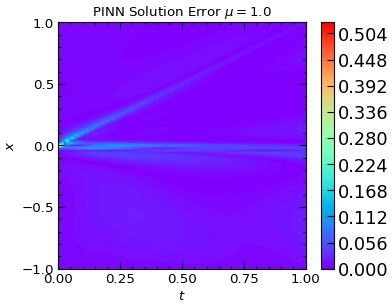

Epoch: 6800 | loss: 0.03411437198519707,rMAE: 0.026053091511130333, rRMSE:0.02819148078560829,loss_RH:0.00000000,loss_con:0.98595899,loss_R:0.033533282577991486,loss_IC:2.5131399524980225e-05,loss_BC:3.297748480690643e-05


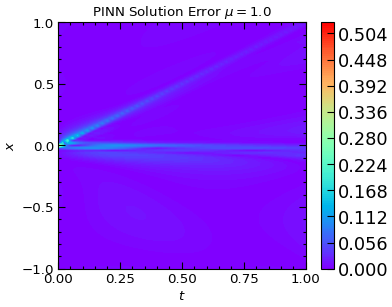

Epoch: 7000 | loss: 0.05117085948586464,rMAE: 0.01996658369898796, rRMSE:0.026531407609581947,loss_RH:0.00000000,loss_con:1.00253940,loss_R:0.05091540515422821,loss_IC:1.4150840797810815e-05,loss_BC:1.139461346610915e-05


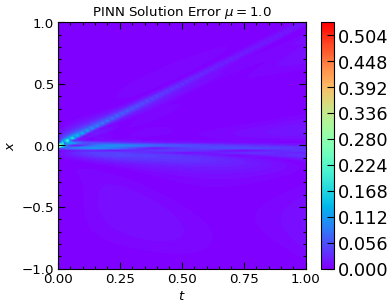

Epoch: 7200 | loss: 0.047968581318855286,rMAE: 0.019104165956377983, rRMSE:0.025818340480327606,loss_RH:0.00000000,loss_con:1.00597084,loss_R:0.0476456880569458,loss_IC:1.5302488463930786e-05,loss_BC:1.698688902251888e-05


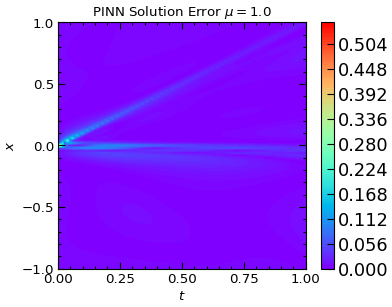

Epoch: 7400 | loss: 0.04830421507358551,rMAE: 0.019361931830644608, rRMSE:0.025401609018445015,loss_RH:0.00000000,loss_con:1.00624800,loss_R:0.04803132638335228,loss_IC:1.3172029866836965e-05,loss_BC:1.4116781130724121e-05


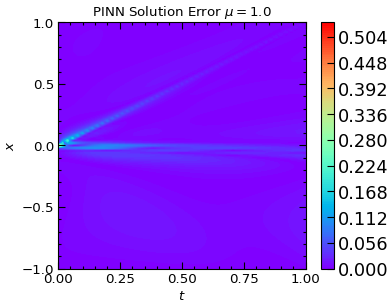

Epoch: 7600 | loss: 0.04620619863271713,rMAE: 0.021518411114811897, rRMSE:0.024903180077672005,loss_RH:0.00000000,loss_con:0.98922229,loss_R:0.045798659324645996,loss_IC:1.621103729121387e-05,loss_BC:2.4542943720007315e-05


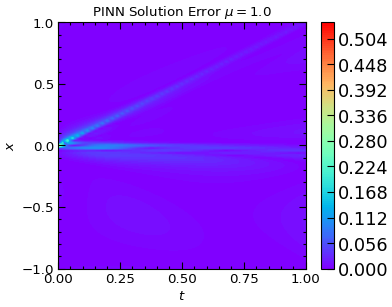

Epoch: 7800 | loss: 0.051905952394008636,rMAE: 0.01681746542453766, rRMSE:0.023662010207772255,loss_RH:0.00000000,loss_con:1.00287211,loss_R:0.05169915407896042,loss_IC:9.57815700530773e-06,loss_BC:1.1101842574134935e-05


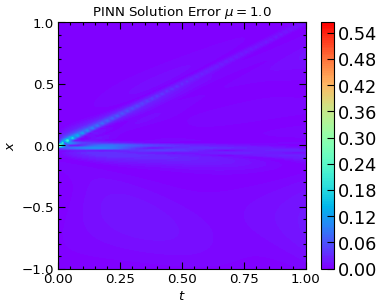

Epoch: 8000 | loss: 0.04498343542218208,rMAE: 0.020050372928380966, rRMSE:0.023798499256372452,loss_RH:0.00000000,loss_con:1.00443423,loss_R:0.04480588063597679,loss_IC:8.732919013709761e-06,loss_BC:9.022435733641032e-06


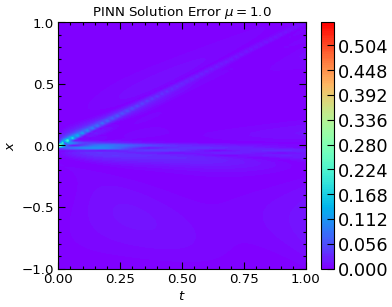

Epoch: 8200 | loss: 0.0539449118077755,rMAE: 0.01753944903612137, rRMSE:0.022875206544995308,loss_RH:0.00000000,loss_con:1.00461996,loss_R:0.05376610904932022,loss_IC:8.600272849434987e-06,loss_BC:9.279974619857967e-06


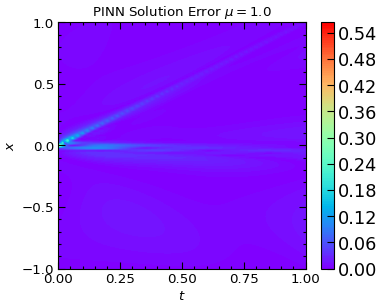

Epoch: 8400 | loss: 0.062047868967056274,rMAE: 0.0198606476187706, rRMSE:0.023167714476585388,loss_RH:0.00000000,loss_con:0.99803340,loss_R:0.061763159930706024,loss_IC:1.0884939001698513e-05,loss_BC:1.7585960449650884e-05


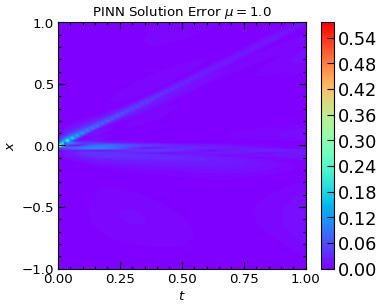

Epoch: 8600 | loss: 0.05356327444314957,rMAE: 0.015146925114095211, rRMSE:0.021763954311609268,loss_RH:0.00000000,loss_con:1.00447893,loss_R:0.05336283892393112,loss_IC:8.576250365877058e-06,loss_BC:1.1467452168290038e-05


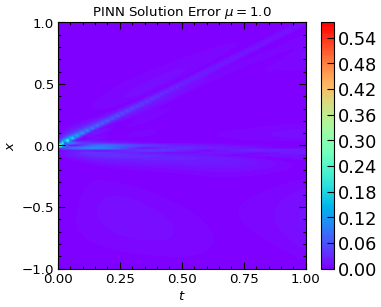

Epoch: 8800 | loss: 0.041175518184900284,rMAE: 0.01488962396979332, rRMSE:0.021321430802345276,loss_RH:0.00000000,loss_con:0.99754328,loss_R:0.041053902357816696,loss_IC:5.172064447833691e-06,loss_BC:6.989522262301762e-06


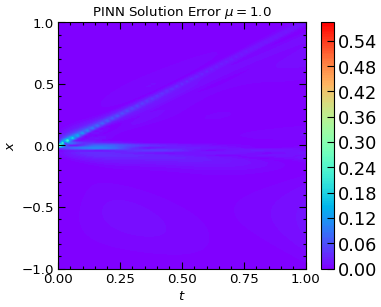

Epoch: 9000 | loss: 0.032757412642240524,rMAE: 0.015423783101141453, rRMSE:0.021321363747119904,loss_RH:0.00000000,loss_con:1.00423253,loss_R:0.03260805457830429,loss_IC:6.70978261041455e-06,loss_BC:8.225862984545529e-06


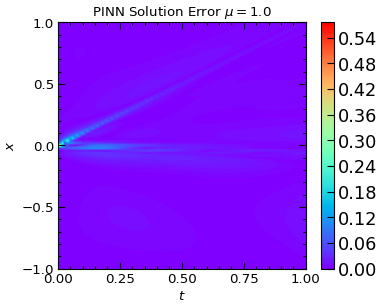

Epoch: 9200 | loss: 0.05209511145949364,rMAE: 0.016050150617957115, rRMSE:0.020852824673056602,loss_RH:0.00000000,loss_con:0.99596775,loss_R:0.05195784941315651,loss_IC:5.290239187161205e-06,loss_BC:8.43580437503988e-06


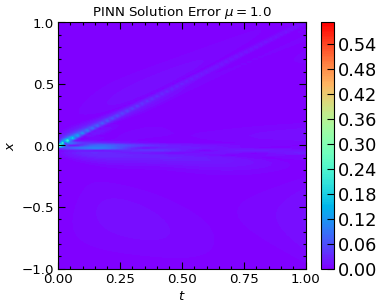

Epoch: 9400 | loss: 0.03757306560873985,rMAE: 0.014694270677864552, rRMSE:0.020342186093330383,loss_RH:0.00000000,loss_con:0.99576443,loss_R:0.03745158389210701,loss_IC:4.642184194381116e-06,loss_BC:7.506001566071063e-06


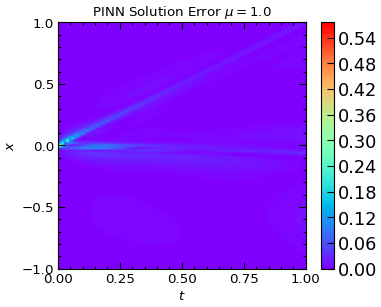

Epoch: 9600 | loss: 0.027942132204771042,rMAE: 0.013312876224517822, rRMSE:0.020233940333127975,loss_RH:0.00000000,loss_con:1.00049198,loss_R:0.02784895896911621,loss_IC:3.9794981603336055e-06,loss_BC:5.337736638466595e-06


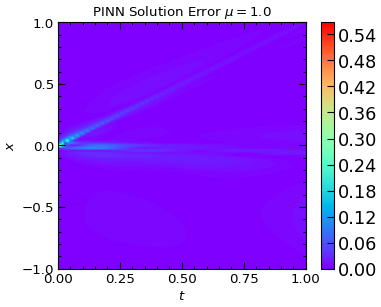

Epoch: 9800 | loss: 0.054623328149318695,rMAE: 0.012434498406946659, rRMSE:0.019514430314302444,loss_RH:0.00000000,loss_con:0.99441069,loss_R:0.05439983680844307,loss_IC:8.237047950387932e-06,loss_BC:1.4111916243564337e-05


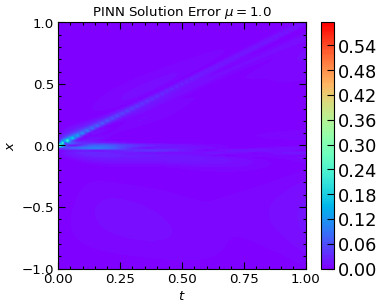

Epoch: 10000 | loss: 0.028932707384228706,rMAE: 0.014609834179282188, rRMSE:0.019817186519503593,loss_RH:0.00000000,loss_con:0.99693650,loss_R:0.028835782781243324,loss_IC:3.740474312508013e-06,loss_BC:5.9519938986341e-06


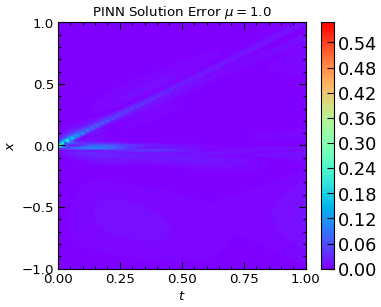

Epoch: 10200 | loss: 0.053765617311000824,rMAE: 0.01399148628115654, rRMSE:0.019507257267832756,loss_RH:0.00000000,loss_con:1.00947750,loss_R:0.05350242927670479,loss_IC:1.0343344001739752e-05,loss_BC:1.5975363567122258e-05


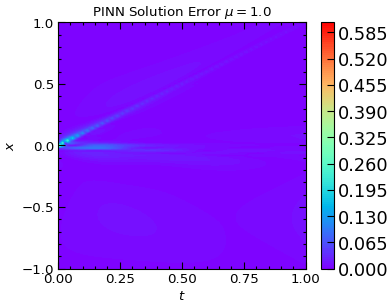

Epoch: 10400 | loss: 0.03487500920891762,rMAE: 0.01623375713825226, rRMSE:0.019686955958604813,loss_RH:0.00000000,loss_con:0.99210125,loss_R:0.034681133925914764,loss_IC:6.809396381868282e-06,loss_BC:1.257796429854352e-05


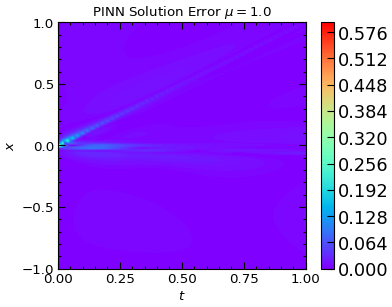

Epoch: 10600 | loss: 0.04966608062386513,rMAE: 0.014763805083930492, rRMSE:0.019236892461776733,loss_RH:0.00000000,loss_con:0.99415600,loss_R:0.049516838043928146,loss_IC:4.419396645971574e-06,loss_BC:1.0504759302421007e-05


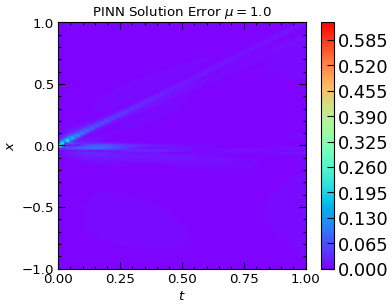

Epoch: 10800 | loss: 0.03280427306890488,rMAE: 0.01310605276376009, rRMSE:0.018771173432469368,loss_RH:0.00000000,loss_con:1.00187266,loss_R:0.03271244093775749,loss_IC:4.132567482884042e-06,loss_BC:5.0505159379099496e-06


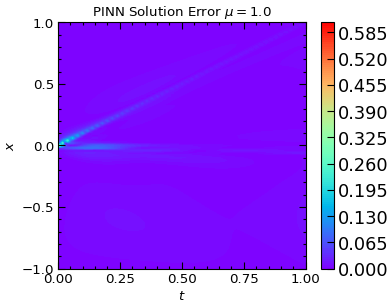

Epoch: 11000 | loss: 0.02539670839905739,rMAE: 0.01487016212195158, rRMSE:0.01903645135462284,loss_RH:0.00000000,loss_con:0.98679250,loss_R:0.025000736117362976,loss_IC:1.2934775440953672e-05,loss_BC:2.666245745786e-05


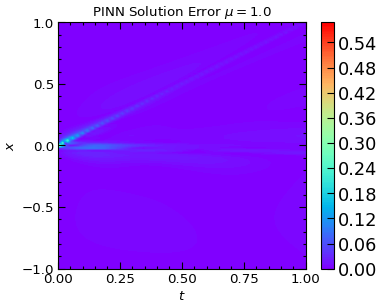

Epoch: 11200 | loss: 0.03880474716424942,rMAE: 0.012386064045131207, rRMSE:0.018106356263160706,loss_RH:0.00000000,loss_con:1.00189996,loss_R:0.0387241393327713,loss_IC:2.993156840602751e-06,loss_BC:5.06764990859665e-06


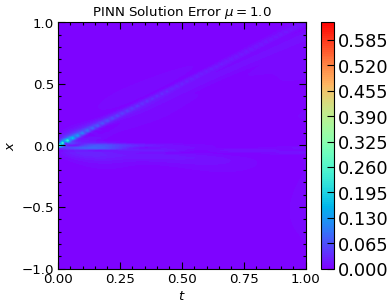

Epoch: 11400 | loss: 0.04014843702316284,rMAE: 0.011377815157175064, rRMSE:0.018232468515634537,loss_RH:0.00000000,loss_con:1.01135075,loss_R:0.039796072989702225,loss_IC:1.3809441043122206e-05,loss_BC:2.1427118554129265e-05


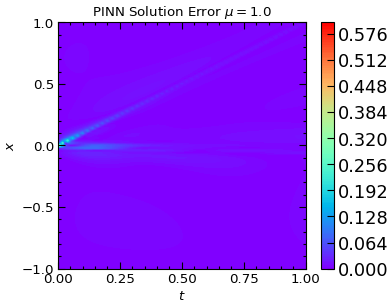

Epoch: 11600 | loss: 0.0638914629817009,rMAE: 0.012516372837126255, rRMSE:0.017894653603434563,loss_RH:0.00000000,loss_con:0.99801642,loss_R:0.0637047216296196,loss_IC:5.350297669792781e-06,loss_BC:1.3323973689693958e-05


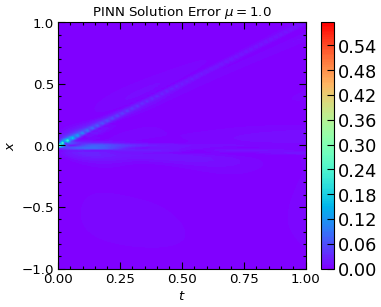

Epoch: 11800 | loss: 0.02678956463932991,rMAE: 0.011069931089878082, rRMSE:0.017552964389324188,loss_RH:0.00000000,loss_con:0.99382240,loss_R:0.026610374450683594,loss_IC:5.443828740681056e-06,loss_BC:1.247517138835974e-05


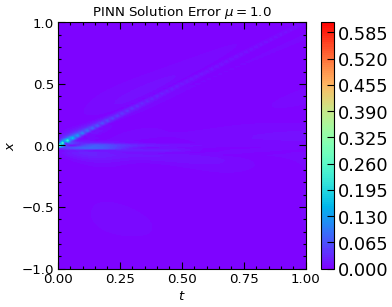

Epoch: 12000 | loss: 0.05659232661128044,rMAE: 0.010992956347763538, rRMSE:0.017418410629034042,loss_RH:0.00000000,loss_con:0.99287200,loss_R:0.05640522763133049,loss_IC:6.694460807921132e-06,loss_BC:1.2015520042041317e-05


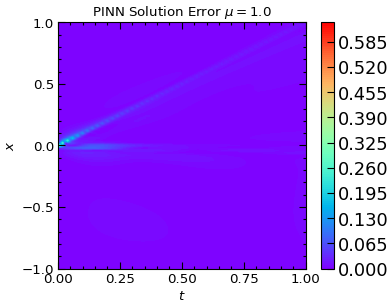

Epoch: 12200 | loss: 0.02516399696469307,rMAE: 0.012273566797375679, rRMSE:0.01793156936764717,loss_RH:0.00000000,loss_con:0.99761951,loss_R:0.025094080716371536,loss_IC:2.296109414601233e-06,loss_BC:4.695531060860958e-06


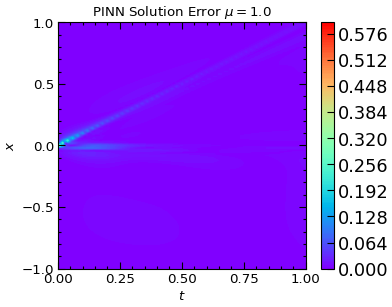

Epoch: 12400 | loss: 0.03309177979826927,rMAE: 0.010061308741569519, rRMSE:0.01691078022122383,loss_RH:0.00000000,loss_con:0.99926281,loss_R:0.033034928143024445,loss_IC:1.7223618442585575e-06,loss_BC:3.962798928114353e-06


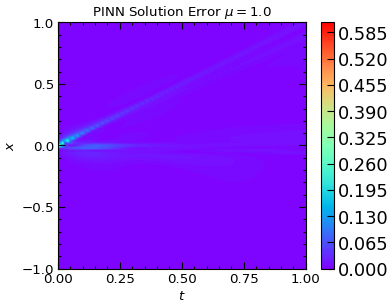

Epoch: 12600 | loss: 0.05254260078072548,rMAE: 0.011689824052155018, rRMSE:0.017655786126852036,loss_RH:0.00000000,loss_con:1.00787830,loss_R:0.05232441425323486,loss_IC:7.640933290531393e-06,loss_BC:1.4177832781570032e-05


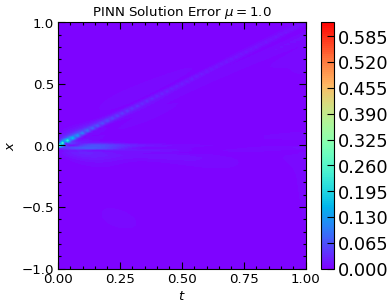

Epoch: 12800 | loss: 0.03735828399658203,rMAE: 0.009884543716907501, rRMSE:0.01671828143298626,loss_RH:0.00000000,loss_con:1.00551605,loss_R:0.037240322679281235,loss_IC:4.139423708693357e-06,loss_BC:7.65682398196077e-06


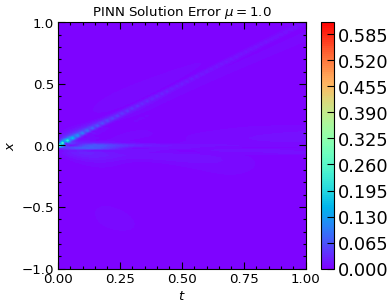

Epoch: 13000 | loss: 0.030615461990237236,rMAE: 0.010053892619907856, rRMSE:0.016931971535086632,loss_RH:0.00000000,loss_con:1.00361025,loss_R:0.03051823563873768,loss_IC:3.853305315715261e-06,loss_BC:5.869381311640609e-06


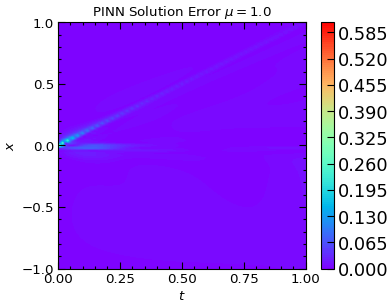

Epoch: 13200 | loss: 0.04441104456782341,rMAE: 0.014369550161063671, rRMSE:0.017573971301317215,loss_RH:0.00000000,loss_con:1.00457716,loss_R:0.044299639761447906,loss_IC:5.253231847746065e-06,loss_BC:5.88724924455164e-06


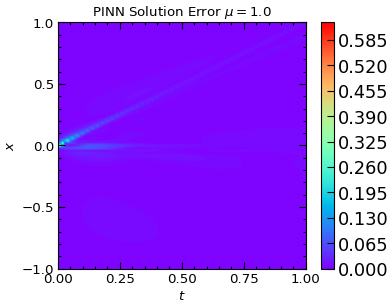

Epoch: 13400 | loss: 0.027903487905859947,rMAE: 0.010171200148761272, rRMSE:0.01651228405535221,loss_RH:0.00000000,loss_con:0.98916858,loss_R:0.027636058628559113,loss_IC:8.202258868550416e-06,loss_BC:1.8540731616667472e-05


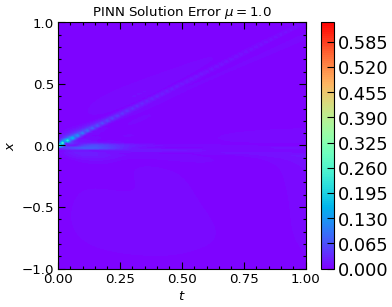

Epoch: 13600 | loss: 0.03836921975016594,rMAE: 0.011962666176259518, rRMSE:0.01692143827676773,loss_RH:0.00000000,loss_con:1.01325607,loss_R:0.037909843027591705,loss_IC:1.416451959812548e-05,loss_BC:3.1773277441971004e-05


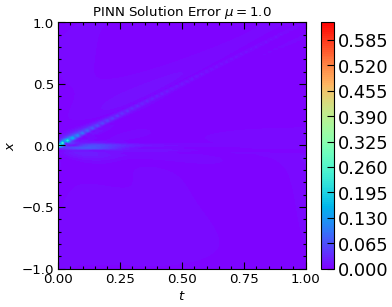

Epoch: 13800 | loss: 0.03046228736639023,rMAE: 0.013907975517213345, rRMSE:0.017040835693478584,loss_RH:0.00000000,loss_con:0.99866337,loss_R:0.030406350269913673,loss_IC:1.915529310281272e-06,loss_BC:3.6781027574761538e-06


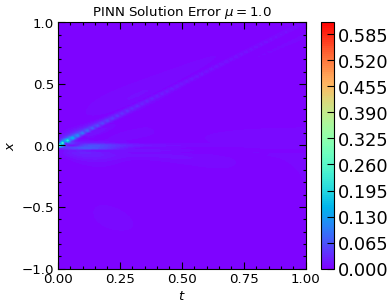

Epoch: 14000 | loss: 0.0465681329369545,rMAE: 0.00922559853643179, rRMSE:0.01576717384159565,loss_RH:0.00000000,loss_con:0.99436390,loss_R:0.046466805040836334,loss_IC:2.8653957997448742e-06,loss_BC:7.2675520641496405e-06


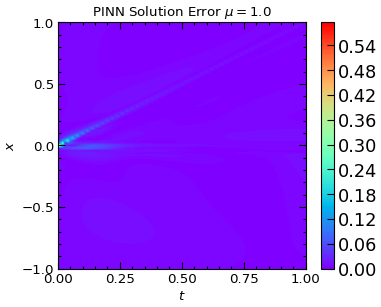

Epoch: 14200 | loss: 0.0245614405721426,rMAE: 0.014133188873529434, rRMSE:0.0168520025908947,loss_RH:0.00000000,loss_con:1.00109923,loss_R:0.024448513984680176,loss_IC:2.9726443244726397e-06,loss_BC:8.319953849422745e-06


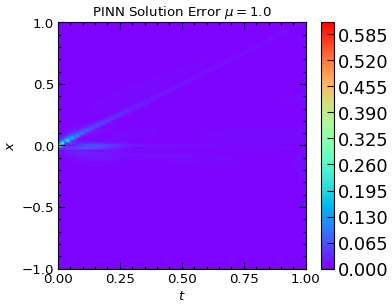

Epoch: 14400 | loss: 0.06571050733327866,rMAE: 0.008802947588264942, rRMSE:0.015650032088160515,loss_RH:0.00000000,loss_con:0.99779141,loss_R:0.06561768054962158,loss_IC:2.73029263553326e-06,loss_BC:6.552595550601836e-06


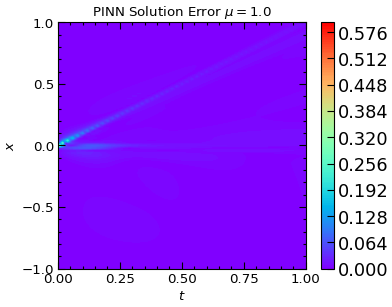

Epoch: 14600 | loss: 0.02718009613454342,rMAE: 0.010294990614056587, rRMSE:0.01632409542798996,loss_RH:0.00000000,loss_con:1.01507843,loss_R:0.026458799839019775,loss_IC:2.045899600489065e-05,loss_BC:5.167067138245329e-05


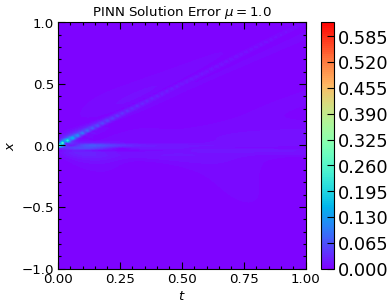

Epoch: 14800 | loss: 0.026731576770544052,rMAE: 0.011322246864438057, rRMSE:0.016823967918753624,loss_RH:0.00000000,loss_con:1.01312268,loss_R:0.026332322508096695,loss_IC:1.4142603504296858e-05,loss_BC:2.5782846932997927e-05


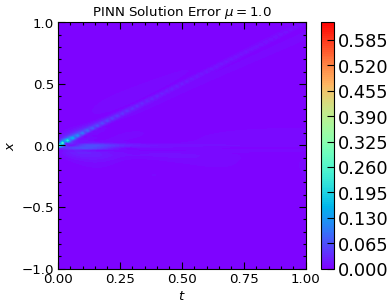

Epoch: 15000 | loss: 0.02977677620947361,rMAE: 0.008784006349742413, rRMSE:0.01580842398107052,loss_RH:0.00000000,loss_con:0.99689615,loss_R:0.029713720083236694,loss_IC:2.02189153242216e-06,loss_BC:4.283656380721368e-06


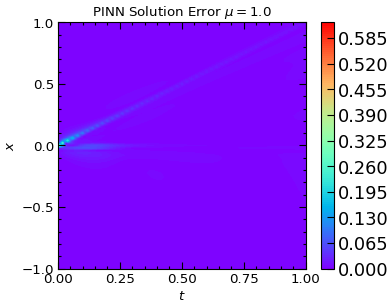

Epoch: 15200 | loss: 0.04573918133974075,rMAE: 0.008880121633410454, rRMSE:0.015496878884732723,loss_RH:0.00000000,loss_con:1.00408900,loss_R:0.04564512148499489,loss_IC:4.659591013478348e-06,loss_BC:4.746390914078802e-06


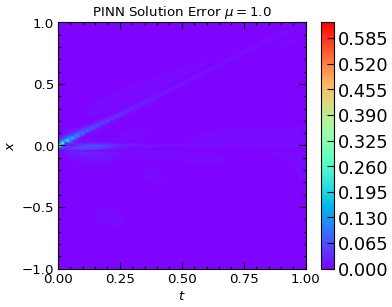

Epoch: 15400 | loss: 0.05225463956594467,rMAE: 0.008726391941308975, rRMSE:0.015389353036880493,loss_RH:0.00000000,loss_con:0.99245012,loss_R:0.05207015946507454,loss_IC:6.137706805020571e-06,loss_BC:1.2310277270444203e-05


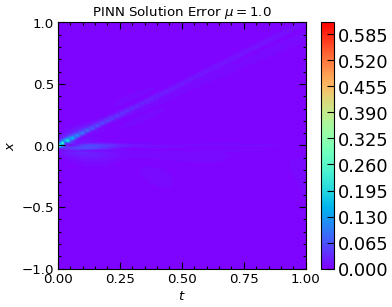

Epoch: 15600 | loss: 0.047873809933662415,rMAE: 0.009194396436214447, rRMSE:0.015465215779840946,loss_RH:0.00000000,loss_con:1.00406826,loss_R:0.04778866097331047,loss_IC:3.7190520743024535e-06,loss_BC:4.795856511918828e-06


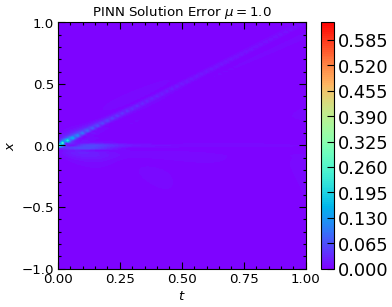

Epoch: 15800 | loss: 0.04895501956343651,rMAE: 0.008315536193549633, rRMSE:0.015134993940591812,loss_RH:0.00000000,loss_con:0.98982501,loss_R:0.04871974512934685,loss_IC:7.955291039252188e-06,loss_BC:1.5571968106087297e-05


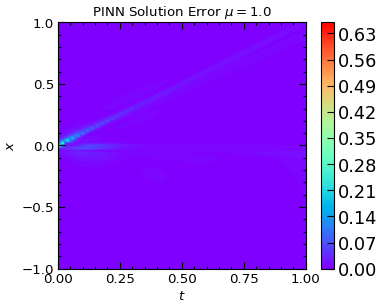

Epoch: 16000 | loss: 0.06459729373455048,rMAE: 0.008327865041792393, rRMSE:0.015531592071056366,loss_RH:0.00000000,loss_con:1.00723016,loss_R:0.06442519277334213,loss_IC:5.024666279496159e-06,loss_BC:1.2185295418021269e-05


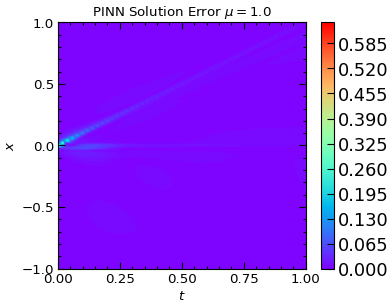

Epoch: 16200 | loss: 0.04876381903886795,rMAE: 0.009380778297781944, rRMSE:0.01567237079143524,loss_RH:0.00000000,loss_con:0.99255687,loss_R:0.04855792224407196,loss_IC:8.585887371737044e-06,loss_BC:1.2003977644781116e-05


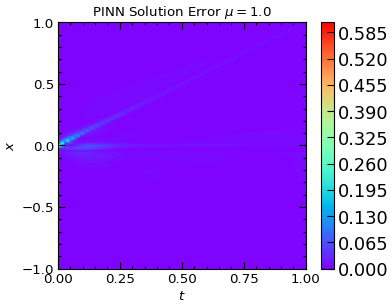

Epoch: 16400 | loss: 0.04993294179439545,rMAE: 0.007536105811595917, rRMSE:0.014681028202176094,loss_RH:0.00000000,loss_con:0.99504060,loss_R:0.049717847257852554,loss_IC:1.0109872164321132e-05,loss_BC:1.1399558388802689e-05


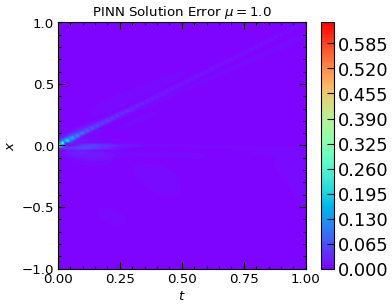

Epoch: 16600 | loss: 0.039115943014621735,rMAE: 0.008627246133983135, rRMSE:0.015065059065818787,loss_RH:0.00000000,loss_con:1.00471628,loss_R:0.0390356220304966,loss_IC:2.7875444175151642e-06,loss_BC:5.244582553132204e-06


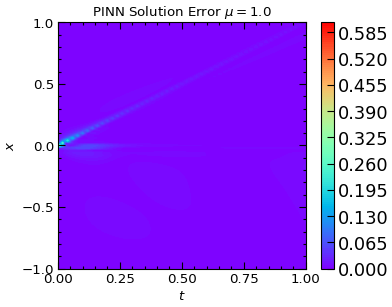

Epoch: 16800 | loss: 0.04902174323797226,rMAE: 0.00930052064359188, rRMSE:0.015013753436505795,loss_RH:0.00000000,loss_con:0.99988031,loss_R:0.04897556081414223,loss_IC:2.453012712066993e-06,loss_BC:2.1651399038091768e-06


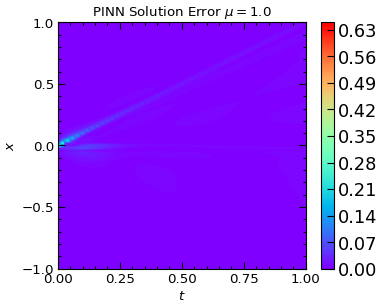

Epoch: 17000 | loss: 0.05645093321800232,rMAE: 0.009109203703701496, rRMSE:0.015200120396912098,loss_RH:0.00000000,loss_con:1.00694168,loss_R:0.05631674453616142,loss_IC:4.941676706948783e-06,loss_BC:8.477371011395007e-06


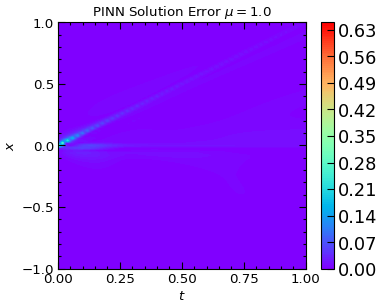

Epoch: 17200 | loss: 0.05343131721019745,rMAE: 0.009659907780587673, rRMSE:0.01579480804502964,loss_RH:0.00000000,loss_con:1.00112998,loss_R:0.053305190056562424,loss_IC:4.3352506509108935e-06,loss_BC:8.277651431853883e-06


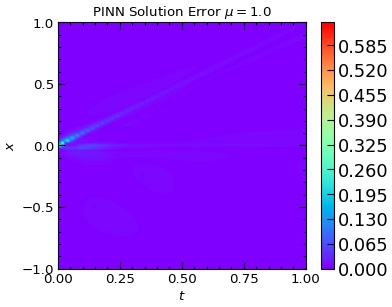

Epoch: 17400 | loss: 0.031145144253969193,rMAE: 0.008625799790024757, rRMSE:0.015064169652760029,loss_RH:0.00000000,loss_con:0.99005455,loss_R:0.030840862542390823,loss_IC:8.045567483350169e-06,loss_BC:2.238253364339471e-05


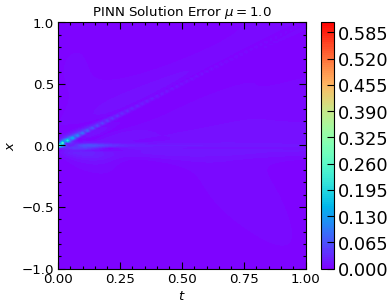

Epoch: 17600 | loss: 0.039376020431518555,rMAE: 0.015122608281672001, rRMSE:0.017432933673262596,loss_RH:0.00000000,loss_con:1.01074016,loss_R:0.03911852464079857,loss_IC:8.498000170220621e-06,loss_BC:1.7251590179512277e-05


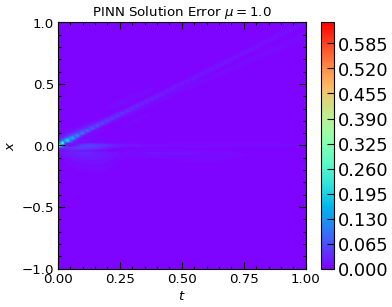

Epoch: 17800 | loss: 0.036981601268053055,rMAE: 0.008176322095096111, rRMSE:0.0148758040741086,loss_RH:0.00000000,loss_con:0.99954444,loss_R:0.036933720111846924,loss_IC:1.5321280670832493e-06,loss_BC:3.2561349598836387e-06


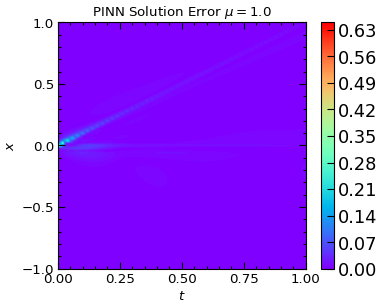

Epoch: 18000 | loss: 0.030081920325756073,rMAE: 0.008130968548357487, rRMSE:0.014805139973759651,loss_RH:0.00000000,loss_con:0.99574208,loss_R:0.03001619130373001,loss_IC:1.7552973758938606e-06,loss_BC:4.8175470510614105e-06


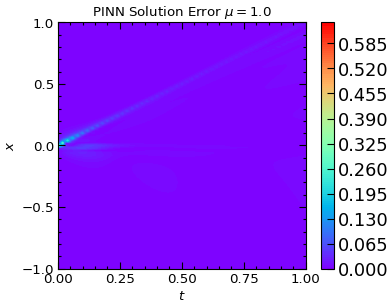

Epoch: 18200 | loss: 0.045994408428668976,rMAE: 0.00937354564666748, rRMSE:0.015233096666634083,loss_RH:0.00000000,loss_con:1.00177491,loss_R:0.045953139662742615,loss_IC:1.1878000805154443e-06,loss_BC:2.9390612326096743e-06


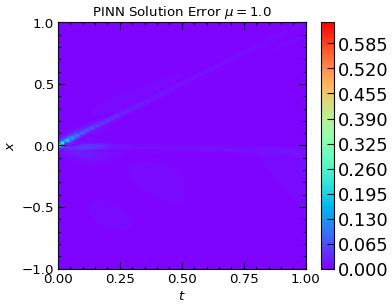

Epoch: 18400 | loss: 0.034921690821647644,rMAE: 0.008190887048840523, rRMSE:0.01451669167727232,loss_RH:0.00000000,loss_con:1.00070202,loss_R:0.034881021827459335,loss_IC:1.769761638570344e-06,loss_BC:2.2972633360041073e-06


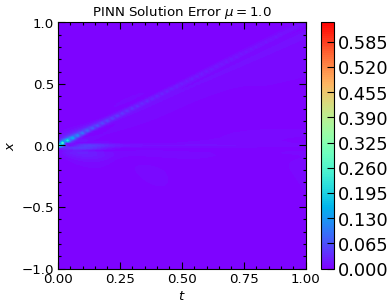

Epoch: 18600 | loss: 0.023983657360076904,rMAE: 0.009417267516255379, rRMSE:0.01542958989739418,loss_RH:0.00000000,loss_con:0.99130762,loss_R:0.02380475215613842,loss_IC:5.853905349795241e-06,loss_BC:1.2036602129228413e-05


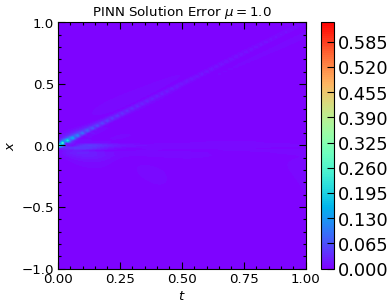

Epoch: 18800 | loss: 0.03173765540122986,rMAE: 0.006843029521405697, rRMSE:0.014143778011202812,loss_RH:0.00000000,loss_con:0.99353933,loss_R:0.031576141715049744,loss_IC:3.831442427326692e-06,loss_BC:1.2319858797127381e-05


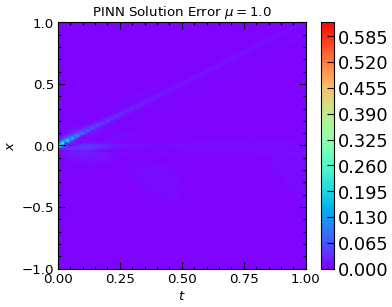

Epoch: 19000 | loss: 0.050571832805871964,rMAE: 0.008434278890490532, rRMSE:0.014451857656240463,loss_RH:0.00000000,loss_con:0.99907029,loss_R:0.05037924274802208,loss_IC:7.733734491921496e-06,loss_BC:1.152508775703609e-05


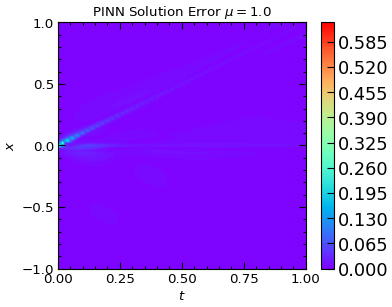

Epoch: 19200 | loss: 0.03298697620630264,rMAE: 0.009718228131532669, rRMSE:0.014754348434507847,loss_RH:0.00000000,loss_con:0.99882996,loss_R:0.03293853998184204,loss_IC:1.5492889815504896e-06,loss_BC:3.2941602512437385e-06


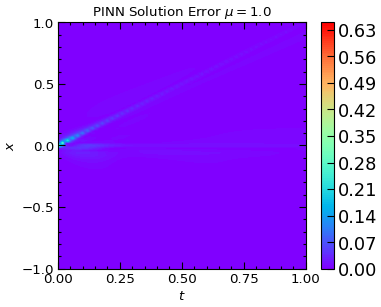

Epoch: 19400 | loss: 0.06461424380540848,rMAE: 0.008041729219257832, rRMSE:0.014770513400435448,loss_RH:0.00000000,loss_con:1.00881624,loss_R:0.0643797218799591,loss_IC:8.936577614804264e-06,loss_BC:1.4515506336465478e-05


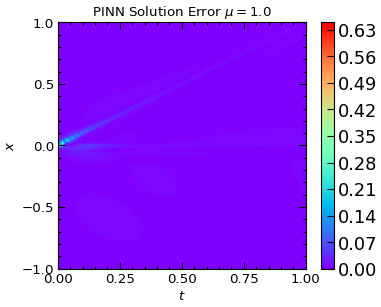

Epoch: 19600 | loss: 0.02466447278857231,rMAE: 0.008837560191750526, rRMSE:0.01456134021282196,loss_RH:0.00000000,loss_con:0.99847746,loss_R:0.024618616327643394,loss_IC:1.7174285176224657e-06,loss_BC:2.8682409265456954e-06


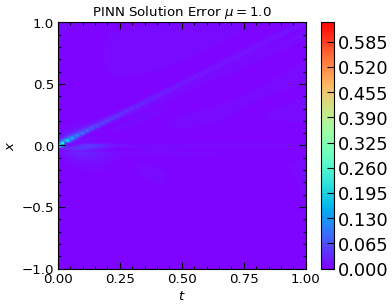

Epoch: 19800 | loss: 0.05983589589595795,rMAE: 0.010274243541061878, rRMSE:0.015215334482491016,loss_RH:0.00000000,loss_con:1.00806403,loss_R:0.059636544436216354,loss_IC:8.135132702591363e-06,loss_BC:1.1800098945968784e-05


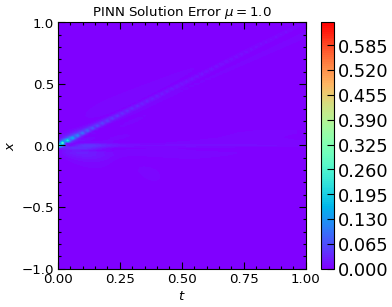

Epoch: 20000 | loss: 0.05691012740135193,rMAE: 0.007558257319033146, rRMSE:0.014441126026213169,loss_RH:0.00000000,loss_con:1.00168753,loss_R:0.05685263127088547,loss_IC:1.4431395811698167e-06,loss_BC:4.306645223550731e-06


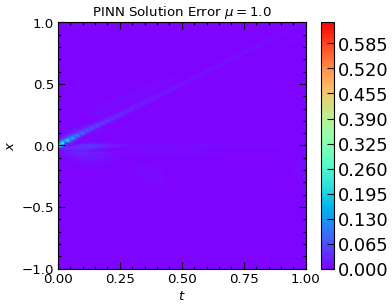

Epoch: 20200 | loss: 0.0433330275118351,rMAE: 0.006259579677134752, rRMSE:0.013911492191255093,loss_RH:0.00000000,loss_con:0.99981773,loss_R:0.043306171894073486,loss_IC:6.189619057295204e-07,loss_BC:2.0667339413193986e-06


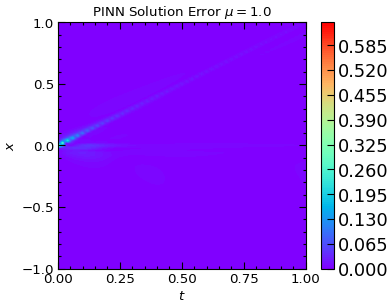

Epoch: 20400 | loss: 0.0417647510766983,rMAE: 0.0062562148086726665, rRMSE:0.013905363157391548,loss_RH:0.00000000,loss_con:0.99992824,loss_R:0.04173740744590759,loss_IC:6.220990371730295e-07,loss_BC:2.112393303832505e-06


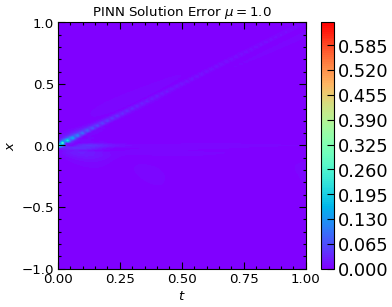

Epoch: 20600 | loss: 0.03726455569267273,rMAE: 0.006479961797595024, rRMSE:0.01395952608436346,loss_RH:0.00000000,loss_con:0.99834239,loss_R:0.037229474633932114,loss_IC:8.544605520910409e-07,loss_BC:2.6536797577136895e-06


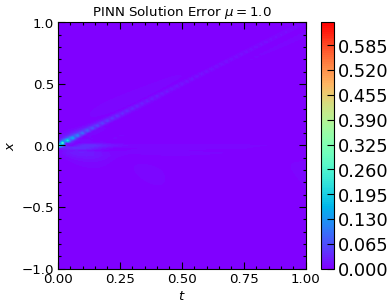

Epoch: 20800 | loss: 0.04869438707828522,rMAE: 0.006163100712001324, rRMSE:0.013880637474358082,loss_RH:0.00000000,loss_con:1.00126207,loss_R:0.048663653433322906,loss_IC:7.607123961861362e-07,loss_BC:2.3128322936827317e-06


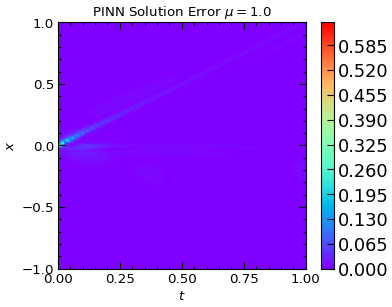

Epoch: 21000 | loss: 0.046234097331762314,rMAE: 0.006143093574792147, rRMSE:0.013849150389432907,loss_RH:0.00000000,loss_con:1.00016999,loss_R:0.046206261962652206,loss_IC:6.473758276115404e-07,loss_BC:2.136234570571105e-06


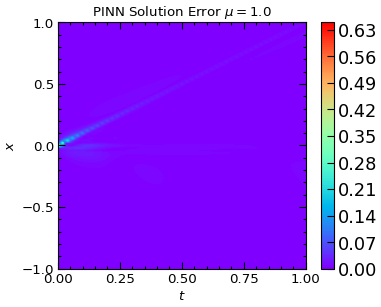

Epoch: 21200 | loss: 0.044340938329696655,rMAE: 0.0062045808881521225, rRMSE:0.013884780928492546,loss_RH:0.00000000,loss_con:1.00026488,loss_R:0.04431280121207237,loss_IC:6.642762286901416e-07,loss_BC:2.1494577140401816e-06


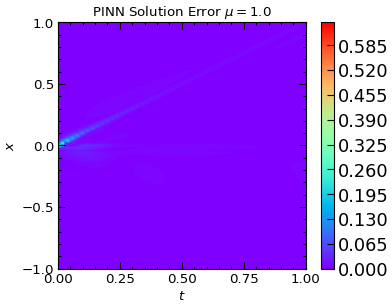

Epoch: 21400 | loss: 0.04108252376317978,rMAE: 0.006185569334775209, rRMSE:0.013790776021778584,loss_RH:0.00000000,loss_con:0.99973810,loss_R:0.04105469211935997,loss_IC:6.353283197313431e-07,loss_BC:2.1479413589986507e-06


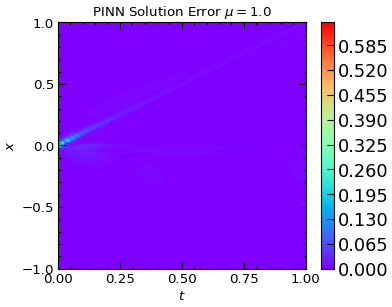

Epoch: 21600 | loss: 0.04282397776842117,rMAE: 0.0060557229444384575, rRMSE:0.013769478537142277,loss_RH:0.00000000,loss_con:0.99981308,loss_R:0.04279615357518196,loss_IC:6.36512254459376e-07,loss_BC:2.1458770333993016e-06


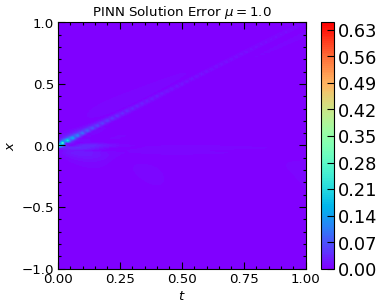

Epoch: 21800 | loss: 0.04057838395237923,rMAE: 0.006017432548105717, rRMSE:0.01376309059560299,loss_RH:0.00000000,loss_con:0.99993920,loss_R:0.040550585836172104,loss_IC:6.372193865900044e-07,loss_BC:2.142444827768486e-06


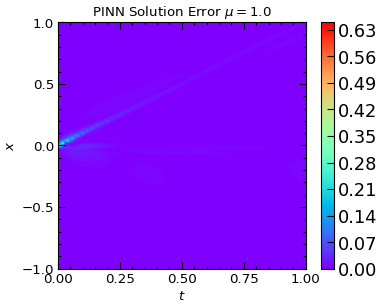

Epoch: 22000 | loss: 0.043777018785476685,rMAE: 0.005998332053422928, rRMSE:0.013736275024712086,loss_RH:0.00000000,loss_con:0.99996912,loss_R:0.04374941065907478,loss_IC:6.337975833048404e-07,loss_BC:2.1268836007948266e-06


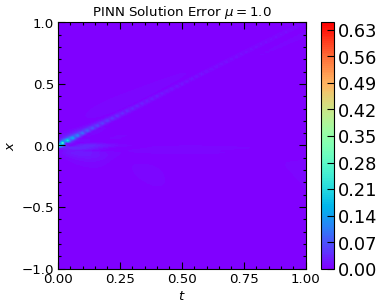

Epoch: 22200 | loss: 0.045272618532180786,rMAE: 0.006016049068421125, rRMSE:0.013728844933211803,loss_RH:0.00000000,loss_con:0.99960178,loss_R:0.04524461552500725,loss_IC:6.443630695684988e-07,loss_BC:2.156044729417772e-06


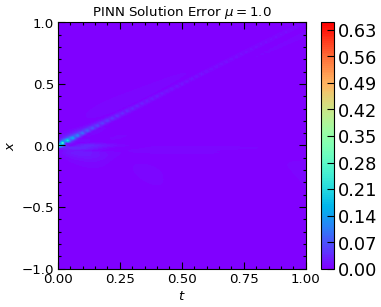

Epoch: 22400 | loss: 0.0428466722369194,rMAE: 0.005954780615866184, rRMSE:0.013697465881705284,loss_RH:0.00000000,loss_con:0.99980879,loss_R:0.042819179594516754,loss_IC:6.236354010979994e-07,loss_BC:2.1257037587929517e-06


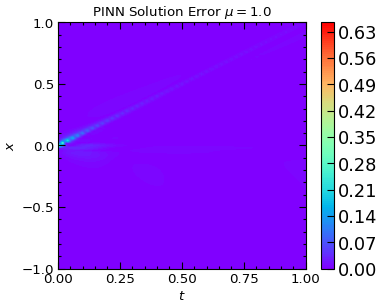

Epoch: 22600 | loss: 0.0488915890455246,rMAE: 0.005905090365558863, rRMSE:0.013702566735446453,loss_RH:0.00000000,loss_con:0.99951905,loss_R:0.04886374622583389,loss_IC:6.571091830664955e-07,loss_BC:2.127118250427884e-06


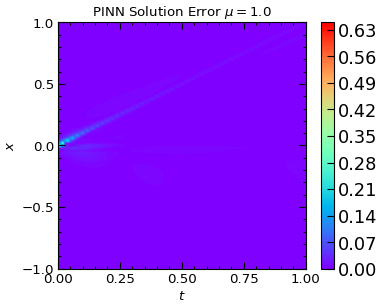

Epoch: 22800 | loss: 0.04304046928882599,rMAE: 0.005901833530515432, rRMSE:0.01367050688713789,loss_RH:0.00000000,loss_con:0.99975395,loss_R:0.04301327466964722,loss_IC:6.14015334576834e-07,loss_BC:2.1056191599200247e-06


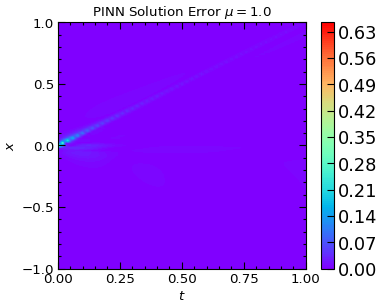

Epoch: 23000 | loss: 0.03636905550956726,rMAE: 0.005918069276958704, rRMSE:0.013659993186593056,loss_RH:0.00000000,loss_con:0.99925578,loss_R:0.03634091094136238,loss_IC:6.410601827155915e-07,loss_BC:2.1732187178713502e-06


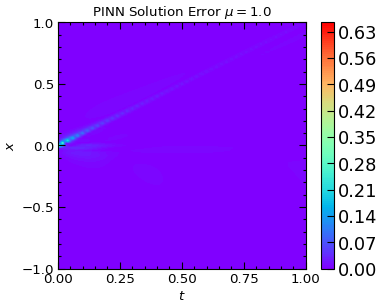

Epoch: 23200 | loss: 0.045376699417829514,rMAE: 0.005845104809850454, rRMSE:0.01363479532301426,loss_RH:0.00000000,loss_con:0.99926233,loss_R:0.04534856975078583,loss_IC:6.367230866999307e-07,loss_BC:2.176105226681102e-06


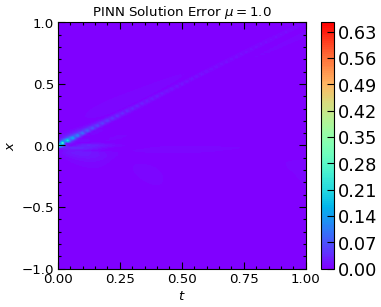

Epoch: 23400 | loss: 0.041802067309617996,rMAE: 0.005861779674887657, rRMSE:0.013642051257193089,loss_RH:0.00000000,loss_con:0.99968302,loss_R:0.04177507013082504,loss_IC:5.964508886791009e-07,loss_BC:2.103312908730004e-06


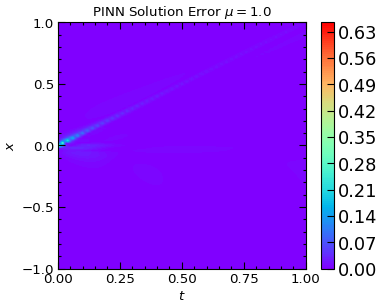

Epoch: 23600 | loss: 0.043151598423719406,rMAE: 0.005869778338819742, rRMSE:0.013623571954667568,loss_RH:0.00000000,loss_con:0.99940401,loss_R:0.0431240014731884,loss_IC:6.084350161472685e-07,loss_BC:2.1511455088329967e-06


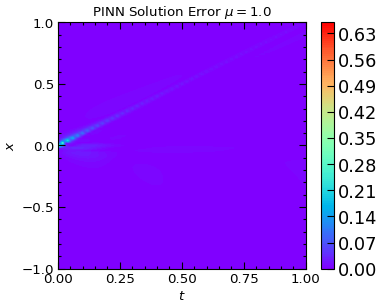

Epoch: 23800 | loss: 0.041341301053762436,rMAE: 0.005789089947938919, rRMSE:0.013625431805849075,loss_RH:0.00000000,loss_con:0.99963993,loss_R:0.0413147434592247,loss_IC:5.874692874385801e-07,loss_BC:2.0681811747635948e-06


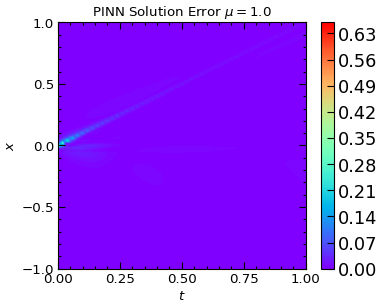

Epoch: 24000 | loss: 0.044452372938394547,rMAE: 0.005752237048000097, rRMSE:0.013615401461720467,loss_RH:0.00000000,loss_con:1.00004959,loss_R:0.04442613571882248,loss_IC:5.787408099422464e-07,loss_BC:2.044863322225865e-06


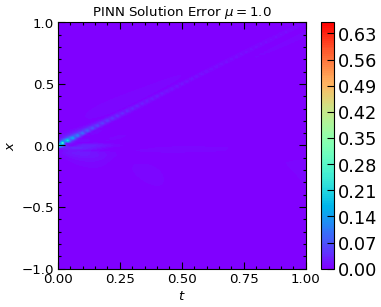

Epoch: 24200 | loss: 0.04173712804913521,rMAE: 0.0057992711663246155, rRMSE:0.013606871478259563,loss_RH:0.00000000,loss_con:0.99906206,loss_R:0.04170903563499451,loss_IC:6.261001885832229e-07,loss_BC:2.183162450819509e-06


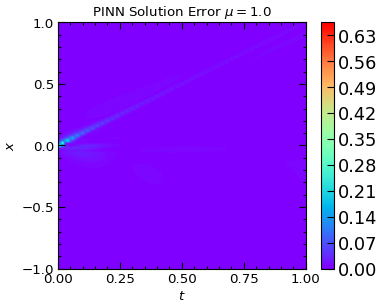

Epoch: 24400 | loss: 0.04667919874191284,rMAE: 0.005690558813512325, rRMSE:0.01360398344695568,loss_RH:0.00000000,loss_con:1.00077665,loss_R:0.04665164649486542,loss_IC:6.324298738036305e-07,loss_BC:2.1226919670880307e-06


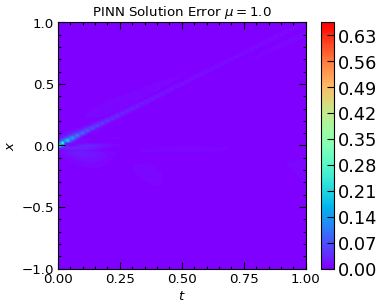

Epoch: 24600 | loss: 0.04425828531384468,rMAE: 0.005697632674127817, rRMSE:0.013599681667983532,loss_RH:0.00000000,loss_con:0.99996209,loss_R:0.04423251003026962,loss_IC:5.519994488167868e-07,loss_BC:2.0255997696949635e-06


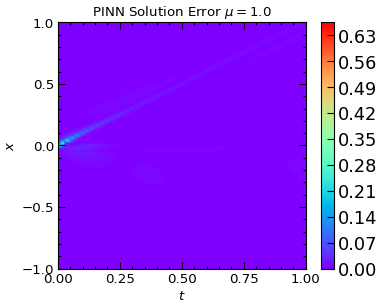

Epoch: 24800 | loss: 0.048091355711221695,rMAE: 0.005730822682380676, rRMSE:0.01360958069562912,loss_RH:0.00000000,loss_con:0.99976265,loss_R:0.048065703362226486,loss_IC:5.567611651713378e-07,loss_BC:2.0083787148905685e-06


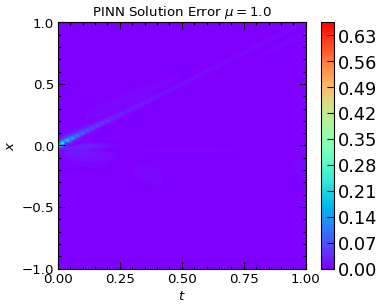

Epoch: 25000 | loss: 0.040704261511564255,rMAE: 0.005661510396748781, rRMSE:0.01357274129986763,loss_RH:0.00000000,loss_con:1.00009203,loss_R:0.04067862406373024,loss_IC:5.392284947447479e-07,loss_BC:2.0246106942067854e-06
PINN Training Completed

PINN Training Time: 0.09125040660431194 Hours


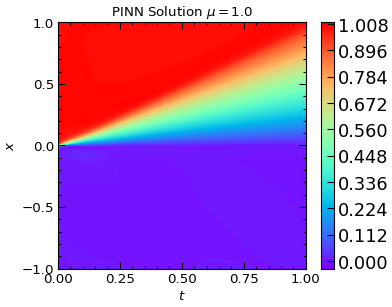

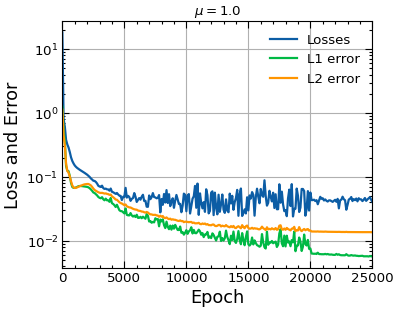

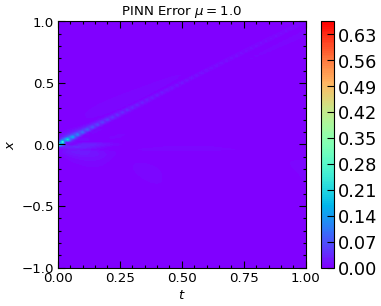

PINN at 1.0 with the rMAE = 0.005661510396748781 and rRMSE = 0.01357274129986763


In [10]:
total_train_time_1 = time.perf_counter()
for i in range(0, number_of_parameters):
    print("******************************************************************")
    ########################### Full PINN Training ###########################
    Exact_y = exact_u(nu_pinn_train,xt_test)[:,None]
    Burgers_plot(xt_test, Exact_y, Nx_test,Nt_test, title=fr"Exact Solution $\mu={round(nu_pinn_train,3)}$")

    pinn_train_time_1 = time.perf_counter()
    PINN = NN(nu_pinn_train, layers_pinn,dt).to(device)
        
    pinn_losses = pinn_train(PINN, nu_pinn_train, xt_resid, IC_xt, IC_u, BC1, BC2,xt_RHL, xt_RHR,xt_RHt,xt_RHtL, f_hat, Exact_y, epochs_pinn, lr_pinn, tol_pinn, xt_test)

    pinn_train_time_2 = time.perf_counter()
    print(f"PINN Training Time: {(pinn_train_time_2-pinn_train_time_1)/3600} Hours")

    Burgers_plot(xt_test, PINN(xt_test),Nx_test,Nt_test, title=fr"PINN Solution $\mu={nu_pinn_train}$")
        
    plt.figure(dpi=80, figsize=(5,4))    
    plt.plot(pinn_losses[0], pinn_losses[1], linewidth=2, label="Losses")
    plt.plot(pinn_losses[0], pinn_losses[2], linewidth=2, label="L1 error")
    plt.plot(pinn_losses[0], pinn_losses[3], linewidth=2, label="L2 error")
    
    plt.xlabel("Epoch",     fontsize=16)
    plt.ylabel("Loss and Error", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
     
    plt.grid(True)
    plt.xlim(0,max(pinn_losses[0]))
    plt.yscale('log')
    plt.title(fr"$\mu={round(nu_pinn_train,3)}$",fontsize=12)
    plt.legend(fontsize = 12)#
    plt.show()

    # Compute Full PINN Error
    rMAE = max(sum(abs(PINN(xt_test)-Exact_y))/sum(abs(Exact_y)))
    rRMSE = torch.sqrt(sum((PINN(xt_test)-Exact_y)**2)/sum((Exact_y)**2)).item()
    Burgers_plot(xt_test, abs(PINN(xt_test)-Exact_y), Nx_test,Nt_test,title=fr"PINN Error $\mu={nu_pinn_train}$")
    print(f"PINN at {nu_pinn_train} with the rMAE = {rMAE} and rRMSE = {rRMSE}")
total_train_time_2 = time.perf_counter()            

In [11]:
w1 = PINN.linears[0].weight.detach().cpu()
w2 = PINN.linears[1].weight.detach().cpu()
w3 = PINN.linears[2].weight.detach().cpu()
w4 = PINN.linears[3].weight.detach().cpu()
w5 = PINN.linears[4].weight.detach().cpu()
#w6 = PINN.linears[5].weight.detach().cpu()

b1 = PINN.linears[0].bias.detach().cpu()
b2 = PINN.linears[1].bias.detach().cpu()
b3 = PINN.linears[2].bias.detach().cpu()
b4 = PINN.linears[3].bias.detach().cpu()
b5 = PINN.linears[4].bias.detach().cpu()
#b6 = PINN.linears[5].bias.detach().cpu()

# Add new activation functions
P_list[i] = P(layers_pinn, w1, w2, w3, w4, w5, b1, b2, b3, b4,b5).to(device)

import pickle 
with open('IFNN_rare.pkl', 'wb') as f:
        pickle.dump(P_list, f)

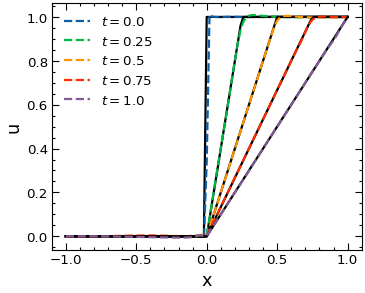

In [10]:
plt.figure(dpi=80, figsize=(5,4))#dpi=150, figsize=(10,8)
for ind in range(1, Nt_test+1,50):
    xx = xt_test[0:Nx_test,:1]
    t = (ind-1)*(Tf-Ti)/(Nt_test-1)
    Ext = Exact_y[(ind-1)*Nx_test:ind*Nx_test,0]
    pin = PINN.forward(xt_test)[(ind-1)*Nx_test:ind*Nx_test,:1]
    plt.plot(xx.detach().cpu(),Ext.detach().cpu(),'k')
    #plt.scatter(xt_test[0:Nx_test,0].detach().cpu(),PINN(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),s=20,label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
    plt.plot(xx.detach().cpu(),pin.detach().cpu(),'--',label=fr"$t={round(t,3)}$")
plt.xlabel("x",     fontsize=16)
plt.ylabel("u", fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.legend(fontsize = 12)#
plt.show()